<a id='Start'></a>

# Getting/Analyzing Data

This Notebook focuses on the representation of data in various visual ways utilizing some of the most commonly recommended python tools. To see more about connecting to databases, check the "3. DB_Connections.ipynb" file

In [1]:
import time

start_time = time.time()

<a id="Pandas"></a>

# Pandas

## 10 Minute Intro to Pandas

Data in python is generally easier to handle via pandas, which is a library that includes a lot of functions to handle data stored in 2D arrays. Essentially tables, which are referred to as dataframes. Here's a quick run down of the pandas library for new users.

[Source](https://pandas.pydata.org/docs/user_guide/10min.html)

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook).

Customarily, we import as follows:

In [2]:
import numpy as np
import pandas as pd

## Basic data structures in pandas

Pandas provides two types of classes for handling data:

1. [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series): a **one-dimensional** labeled array holding data of any type such as integers, strings, Python objects etc.

1. [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame): a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

## Object creation

See the [Intro to data structures section](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro).

Creating a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by passing a list of values, letting pandas create a default [`RangeIndex`](https://pandas.pydata.org/docs/reference/api/pandas.RangeIndex.html#pandas.RangeIndex).

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by passing a NumPy array with a datetime index using [`date_range()`](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html#pandas.date_range) and labeled columns:

In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

df

A         B         C         D
2013-01-01 -0.786910  0.022701 -0.641346 -1.107969
2013-01-02 -1.141307  0.727794 -0.434177  1.584595
2013-01-03 -2.237975  1.568266  0.298981 -0.147194
2013-01-04 -1.929030  0.662653 -0.874965 -0.684369
2013-01-05  2.512062  2.511712 -0.517665  0.216462
2013-01-06  1.667961  1.423043  0.107545  0.156087

Creating a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by passing a dictionary of objects where the keys are the column labels and the values are the column values.

In [6]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

The columns of the resulting [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) have different [dtypes](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes):

In [7]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [8]:
# df2.[press tab at this point]
df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

As you can see, the columns `A`, `B`, `C`, and `D` are automatically tab completed. `E` and `F` are there as well; the rest of the attributes have been truncated for brevity.

## Viewing data

See the [Essential basics functionality section](https://pandas.pydata.org/docs/user_guide/basics.html#basics).

Use [`DataFrame.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head) and [`DataFrame.tail()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail) to view the top and bottom rows of the frame respectively:

In [9]:
df.head()

A         B         C         D
2013-01-01 -0.786910  0.022701 -0.641346 -1.107969
2013-01-02 -1.141307  0.727794 -0.434177  1.584595
2013-01-03 -2.237975  1.568266  0.298981 -0.147194
2013-01-04 -1.929030  0.662653 -0.874965 -0.684369
2013-01-05  2.512062  2.511712 -0.517665  0.216462

In [10]:
df.tail(3)

A         B         C         D
2013-01-04 -1.929030  0.662653 -0.874965 -0.684369
2013-01-05  2.512062  2.511712 -0.517665  0.216462
2013-01-06  1.667961  1.423043  0.107545  0.156087

Display the [`DataFrame.index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html#pandas.DataFrame.index) or [`DataFrame.columns`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns):

In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

Return a NumPy representation of the underlying data with [`DataFrame.to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) without the index or column labels:

In [13]:
df.to_numpy()

array([[-0.78691024,  0.02270101, -0.64134581, -1.10796883],
       [-1.14130712,  0.72779408, -0.4341766 ,  1.58459495],
       [-2.23797542,  1.56826642,  0.29898142, -0.14719425],
       [-1.92902976,  0.66265333, -0.87496456, -0.68436944],
       [ 2.51206185,  2.51171191, -0.51766488,  0.21646165],
       [ 1.66796081,  1.42304291,  0.10754529,  0.15608745]])

<div class="alert alert-block alert-info"> 
    <b>Note:</b> NumPy arrays have one dtype for the entire array while pandas DataFrames have one dtype per column. When you call <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy"><code>DataFrame.to_numpy()</code></a>, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. If the common data type is <code>object</code>,
<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy"><code>DataFrame.to_numpy()</code></a> will require copying data.
</div>

In [14]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [15]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

[`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) shows a quick statistic summary of your data:

In [16]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean  -0.319200  1.152695 -0.343604  0.002935
std    1.956155  0.870664  0.452978  0.927333
min   -2.237975  0.022701 -0.874965 -1.107969
25%   -1.732099  0.678939 -0.610426 -0.550076
50%   -0.964109  1.075418 -0.475921  0.004447
75%    1.054243  1.531961 -0.027885  0.201368
max    2.512062  2.511712  0.298981  1.584595

Transposing your data:

In [17]:
df.T

2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A   -0.786910   -1.141307   -2.237975   -1.929030    2.512062    1.667961
B    0.022701    0.727794    1.568266    0.662653    2.511712    1.423043
C   -0.641346   -0.434177    0.298981   -0.874965   -0.517665    0.107545
D   -1.107969    1.584595   -0.147194   -0.684369    0.216462    0.156087

[`DataFrame.sort_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html#pandas.DataFrame.sort_index) sorts by an axis:

In [18]:
df.sort_index(axis=1, ascending=False)

D         C         B         A
2013-01-01 -1.107969 -0.641346  0.022701 -0.786910
2013-01-02  1.584595 -0.434177  0.727794 -1.141307
2013-01-03 -0.147194  0.298981  1.568266 -2.237975
2013-01-04 -0.684369 -0.874965  0.662653 -1.929030
2013-01-05  0.216462 -0.517665  2.511712  2.512062
2013-01-06  0.156087  0.107545  1.423043  1.667961

[`DataFrame.sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values) sorts by values:

In [19]:
df.sort_values(by="B")

A         B         C         D
2013-01-01 -0.786910  0.022701 -0.641346 -1.107969
2013-01-04 -1.929030  0.662653 -0.874965 -0.684369
2013-01-02 -1.141307  0.727794 -0.434177  1.584595
2013-01-06  1.667961  1.423043  0.107545  0.156087
2013-01-03 -2.237975  1.568266  0.298981 -0.147194
2013-01-05  2.512062  2.511712 -0.517665  0.216462

## Selection

> **_Note:_** While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, [`DataFrame.at()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at), [`DataFrame.iat()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat), [`DataFrame.loc()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc) and [`DataFrame.iloc()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc).

See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced).

### Getitem ([])

For a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame), passing a single label selects a columns and yields a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) equivalent to `df.A`:

In [20]:
df["A"]

2013-01-01   -0.786910
2013-01-02   -1.141307
2013-01-03   -2.237975
2013-01-04   -1.929030
2013-01-05    2.512062
2013-01-06    1.667961
Freq: D, Name: A, dtype: float64

For a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame), passing a slice `:` selects matching rows:

In [21]:
df[0:3]

A         B         C         D
2013-01-01 -0.786910  0.022701 -0.641346 -1.107969
2013-01-02 -1.141307  0.727794 -0.434177  1.584595
2013-01-03 -2.237975  1.568266  0.298981 -0.147194

In [22]:
df["20130102":"20130104"]

A         B         C         D
2013-01-02 -1.141307  0.727794 -0.434177  1.584595
2013-01-03 -2.237975  1.568266  0.298981 -0.147194
2013-01-04 -1.929030  0.662653 -0.874965 -0.684369

### Selection by label

See more in [Selection by Label](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label) using [`DataFrame.loc()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc) or [`DataFrame.at()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at).

Selecting a row matching a label:

In [23]:
df.loc[dates[0]]

A   -0.786910
B    0.022701
C   -0.641346
D   -1.107969
Name: 2013-01-01 00:00:00, dtype: float64

Selecting all rows (`:`) with a select column labels:

In [24]:
df.loc[:, ["A", "B"]]

A         B
2013-01-01 -0.786910  0.022701
2013-01-02 -1.141307  0.727794
2013-01-03 -2.237975  1.568266
2013-01-04 -1.929030  0.662653
2013-01-05  2.512062  2.511712
2013-01-06  1.667961  1.423043

For label slicing, both endpoints are included:

In [25]:
df.loc["20130102":"20130104", ["A", "B"]]

A         B
2013-01-02 -1.141307  0.727794
2013-01-03 -2.237975  1.568266
2013-01-04 -1.929030  0.662653

Selecting a single row and column label returns a scalar:

In [26]:
df.loc[dates[0], "A"]

-0.7869102410091802

### Selection by position

See more in [Selection by Position](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer) using [`DataFrame.iloc()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc) or [`DataFrame.iat()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat).

Select via the position of the passed integers:

In [27]:
df.iloc[3]

A   -1.929030
B    0.662653
C   -0.874965
D   -0.684369
Name: 2013-01-04 00:00:00, dtype: float64

Integer slices acts similar to NumPy/Python:

In [28]:
df.iloc[3:5, 0:2]

A         B
2013-01-04 -1.929030  0.662653
2013-01-05  2.512062  2.511712

Lists of integer position locations:

In [29]:
df.iloc[[1, 2, 4], [0, 2]]

A         C
2013-01-02 -1.141307 -0.434177
2013-01-03 -2.237975  0.298981
2013-01-05  2.512062 -0.517665

For slicing rows explicitly:

In [30]:
df.iloc[1:3, :]

A         B         C         D
2013-01-02 -1.141307  0.727794 -0.434177  1.584595
2013-01-03 -2.237975  1.568266  0.298981 -0.147194

For slicing columns explicitly:

In [31]:
df.iloc[:, 1:3]

B         C
2013-01-01  0.022701 -0.641346
2013-01-02  0.727794 -0.434177
2013-01-03  1.568266  0.298981
2013-01-04  0.662653 -0.874965
2013-01-05  2.511712 -0.517665
2013-01-06  1.423043  0.107545

For getting a value explicitly:

In [32]:
df.iloc[1, 1]

0.7277940817399521

For getting fast access to a scalar (equivalent to the prior method):

In [33]:
df.iat[1, 1]

0.7277940817399521

### Boolean Indexing

Select rows where `df.A` is greater than `0`.

In [34]:
df[df["A"] > 0]

A         B         C         D
2013-01-05  2.512062  2.511712 -0.517665  0.216462
2013-01-06  1.667961  1.423043  0.107545  0.156087

Selecting values from a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) where a boolean condition is met:

In [35]:
df[df > 0]

A         B         C         D
2013-01-01       NaN  0.022701       NaN       NaN
2013-01-02       NaN  0.727794       NaN  1.584595
2013-01-03       NaN  1.568266  0.298981       NaN
2013-01-04       NaN  0.662653       NaN       NaN
2013-01-05  2.512062  2.511712       NaN  0.216462
2013-01-06  1.667961  1.423043  0.107545  0.156087

Using [`isin()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) method for filtering:

In [36]:
df2 = df.copy()

In [37]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

A         B         C         D      E
2013-01-01 -0.786910  0.022701 -0.641346 -1.107969    one
2013-01-02 -1.141307  0.727794 -0.434177  1.584595    one
2013-01-03 -2.237975  1.568266  0.298981 -0.147194    two
2013-01-04 -1.929030  0.662653 -0.874965 -0.684369  three
2013-01-05  2.512062  2.511712 -0.517665  0.216462   four
2013-01-06  1.667961  1.423043  0.107545  0.156087  three

In [38]:
df2[df2["E"].isin(["two", "four"])]

A         B         C         D     E
2013-01-03 -2.237975  1.568266  0.298981 -0.147194   two
2013-01-05  2.512062  2.511712 -0.517665  0.216462  four

### Setting

Setting a new column automatically aligns the data by the indexes:

In [39]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [40]:
df["F"] = s1
df

A         B         C         D    F
2013-01-01 -0.786910  0.022701 -0.641346 -1.107969  NaN
2013-01-02 -1.141307  0.727794 -0.434177  1.584595  1.0
2013-01-03 -2.237975  1.568266  0.298981 -0.147194  2.0
2013-01-04 -1.929030  0.662653 -0.874965 -0.684369  3.0
2013-01-05  2.512062  2.511712 -0.517665  0.216462  4.0
2013-01-06  1.667961  1.423043  0.107545  0.156087  5.0

Setting values by label:

In [41]:
df.at[dates[0], "A"] = 0
df

A         B         C         D    F
2013-01-01  0.000000  0.022701 -0.641346 -1.107969  NaN
2013-01-02 -1.141307  0.727794 -0.434177  1.584595  1.0
2013-01-03 -2.237975  1.568266  0.298981 -0.147194  2.0
2013-01-04 -1.929030  0.662653 -0.874965 -0.684369  3.0
2013-01-05  2.512062  2.511712 -0.517665  0.216462  4.0
2013-01-06  1.667961  1.423043  0.107545  0.156087  5.0

Setting values by position:

In [42]:
df.iat[0, 1] = 0
df

A         B         C         D    F
2013-01-01  0.000000  0.000000 -0.641346 -1.107969  NaN
2013-01-02 -1.141307  0.727794 -0.434177  1.584595  1.0
2013-01-03 -2.237975  1.568266  0.298981 -0.147194  2.0
2013-01-04 -1.929030  0.662653 -0.874965 -0.684369  3.0
2013-01-05  2.512062  2.511712 -0.517665  0.216462  4.0
2013-01-06  1.667961  1.423043  0.107545  0.156087  5.0

Setting by assigning with a NumPy array:

In [43]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations:

In [44]:
df

A         B         C    D    F
2013-01-01  0.000000  0.000000 -0.641346  5.0  NaN
2013-01-02 -1.141307  0.727794 -0.434177  5.0  1.0
2013-01-03 -2.237975  1.568266  0.298981  5.0  2.0
2013-01-04 -1.929030  0.662653 -0.874965  5.0  3.0
2013-01-05  2.512062  2.511712 -0.517665  5.0  4.0
2013-01-06  1.667961  1.423043  0.107545  5.0  5.0

A `where` operation with setting:

In [45]:
df2 = df.copy()

In [46]:
df2[df2 > 0] = -df2
df2

A         B         C    D    F
2013-01-01  0.000000  0.000000 -0.641346 -5.0  NaN
2013-01-02 -1.141307 -0.727794 -0.434177 -5.0 -1.0
2013-01-03 -2.237975 -1.568266 -0.298981 -5.0 -2.0
2013-01-04 -1.929030 -0.662653 -0.874965 -5.0 -3.0
2013-01-05 -2.512062 -2.511712 -0.517665 -5.0 -4.0
2013-01-06 -1.667961 -1.423043 -0.107545 -5.0 -5.0

## Missing Data

For NumPy data types, `np.nan` represents missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data).

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [47]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [48]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [49]:
df1

A         B         C    D    F    E
2013-01-01  0.000000  0.000000 -0.641346  5.0  NaN  1.0
2013-01-02 -1.141307  0.727794 -0.434177  5.0  1.0  1.0
2013-01-03 -2.237975  1.568266  0.298981  5.0  2.0  NaN
2013-01-04 -1.929030  0.662653 -0.874965  5.0  3.0  NaN

[`DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) drops any rows that have missing data:

In [50]:
df1.dropna(how="any")

A         B         C    D    F    E
2013-01-02 -1.141307  0.727794 -0.434177  5.0  1.0  1.0

[`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) fills missing data:

In [51]:
df1.fillna(value=5)

A         B         C    D    F    E
2013-01-01  0.000000  0.000000 -0.641346  5.0  5.0  1.0
2013-01-02 -1.141307  0.727794 -0.434177  5.0  1.0  1.0
2013-01-03 -2.237975  1.568266  0.298981  5.0  2.0  5.0
2013-01-04 -1.929030  0.662653 -0.874965  5.0  3.0  5.0

[`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna) gets the boolean mask where values are `nan`:

In [52]:
pd.isna(df1)

A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True

## Operations

See the [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### Stats

Operations in general exclude missing data.

Calculate the mean value for each column:

In [53]:
df.mean()

A   -0.188048
B    1.148911
C   -0.343604
D    5.000000
F    3.000000
dtype: float64

Calculate the mean value for each row:

In [54]:
df.mean(axis=1)

2013-01-01    1.089664
2013-01-02    1.030462
2013-01-03    1.325854
2013-01-04    1.171732
2013-01-05    2.701222
2013-01-06    2.639710
Freq: D, dtype: float64

Operating with another [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) or [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) with a different index or column will align the result with the union of the index or column labels. In addition, pandas automatically broadcasts along the specified dimension and will fill unaligned labels with `np.nan`.

In [55]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [56]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [57]:
df.sub(s, axis="index")

A         B         C    D    F
2013-01-01       NaN       NaN       NaN  NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN  NaN
2013-01-03 -3.237975  0.568266 -0.701019  4.0  1.0
2013-01-04 -4.929030 -2.337347 -3.874965  2.0  0.0
2013-01-05 -2.487938 -2.488288 -5.517665  0.0 -1.0
2013-01-06       NaN       NaN       NaN  NaN  NaN

### User defined functions

[`DataFrame.agg()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html#pandas.DataFrame.agg) and [`DataFrame.transform()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html#pandas.DataFrame.transform) applies a user defined function that reduces or broadcasts its result respectively.

In [58]:
df.agg(lambda x: np.mean(x) * 5.6)

A    -1.053070
B     6.433904
C    -1.924183
D    28.000000
F    16.800000
dtype: float64

In [59]:
df.transform(lambda x: x * 101.2)

A           B          C      D      F
2013-01-01    0.000000    0.000000 -64.904196  506.0    NaN
2013-01-02 -115.500281   73.652761 -43.938672  506.0  101.2
2013-01-03 -226.483113  158.708561  30.256920  506.0  202.4
2013-01-04 -195.217812   67.060517 -88.546413  506.0  303.6
2013-01-05  254.220660  254.185245 -52.387685  506.0  404.8
2013-01-06  168.797634  144.011943  10.883584  506.0  506.0

### Value Counts

See more at [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization).

In [60]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [61]:
s

0    5
1    2
2    0
3    2
4    2
5    2
6    1
7    2
8    6
9    2
dtype: int32

In [62]:
s.value_counts()

2    6
5    1
0    1
1    1
6    1
Name: count, dtype: int64

### String Methods

[`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. See more at [Vectorized String Methods](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods).

In [63]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [64]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) and [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [`Merging section`](https://pandas.pydata.org/docs/user_guide/merging.html#merging).

Concatenating pandas objects together row-wise with [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat):

In [65]:
df = pd.DataFrame(np.random.randn(10, 4))

In [66]:
df

0         1         2         3
0  0.153219 -0.731003  1.019354 -1.436029
1  1.881704 -0.918753  0.025486  0.053268
2  0.064154  0.111821 -1.771192  1.637626
3 -1.523971  1.593653  0.812274  0.214632
4  0.273037 -0.162642 -0.555501  0.128293
5  0.129082  1.296876  1.348699 -0.185832
6 -1.894804  1.595210 -0.871445  2.325726
7 -0.321727  0.038372  0.706120 -2.698534
8  2.105954 -0.059727  0.553670  0.866520
9  0.544231 -1.764559 -1.167993  0.698784

In [67]:
# Breaking it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.153219 -0.731003  1.019354 -1.436029
 1  1.881704 -0.918753  0.025486  0.053268
 2  0.064154  0.111821 -1.771192  1.637626,
           0         1         2         3
 3 -1.523971  1.593653  0.812274  0.214632
 4  0.273037 -0.162642 -0.555501  0.128293
 5  0.129082  1.296876  1.348699 -0.185832
 6 -1.894804  1.595210 -0.871445  2.325726,
           0         1         2         3
 7 -0.321727  0.038372  0.706120 -2.698534
 8  2.105954 -0.059727  0.553670  0.866520
 9  0.544231 -1.764559 -1.167993  0.698784]

In [68]:
pd.concat(pieces)

0         1         2         3
0  0.153219 -0.731003  1.019354 -1.436029
1  1.881704 -0.918753  0.025486  0.053268
2  0.064154  0.111821 -1.771192  1.637626
3 -1.523971  1.593653  0.812274  0.214632
4  0.273037 -0.162642 -0.555501  0.128293
5  0.129082  1.296876  1.348699 -0.185832
6 -1.894804  1.595210 -0.871445  2.325726
7 -0.321727  0.038372  0.706120 -2.698534
8  2.105954 -0.059727  0.553670  0.866520
9  0.544231 -1.764559 -1.167993  0.698784

<div class="alert alert-block alert-info">
<b>Note:</b> Adding a column to a <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame"><code>DataFrame</code></a> is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame"><code>DataFrame</code></a> constructor instead of building a <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame"><code>DataFrame</code></a>) by iteratively appending records to it.
</div>

### Join

[`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) enables SQL style join types along specific columns. See the [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) section.

In [69]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [70]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [71]:
left

key  lval
0  foo     1
1  foo     2

In [72]:
right

key  rval
0  foo     4
1  foo     5

In [73]:
pd.merge(left, right, on="key")

key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

[`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) on unique keys:

In [74]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [75]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [76]:
left

key  lval
0  foo     1
1  bar     2

In [77]:
right

key  rval
0  foo     4
1  bar     5

In [78]:
pd.merge(left, right, on="key")

key  lval  rval
0  foo     1     4
1  bar     2     5

## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

See the [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby).

In [79]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [80]:
df

A      B         C         D
0  foo    one  0.321937  1.511319
1  bar    one -1.402540  0.440866
2  foo    two  2.185841 -0.524640
3  bar  three  0.063182  1.551915
4  foo    two  0.262797  0.400347
5  bar    two  0.292433 -0.413717
6  foo    one  0.455464 -1.880325
7  foo  three -0.907895 -1.599244

Grouping by a column label, selecting column labels, and then applying the [`DataFrameGroupBy.sum()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.sum.html#pandas.core.groupby.DataFrameGroupBy.sum) function to the resulting groups:

In [81]:
df.groupby("A")[["C", "D"]].sum()

C         D
A                      
bar -1.046925  1.579064
foo  2.318143 -2.092543

Grouping by multiple columns label forms [`MultiIndex`](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex).

In [82]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.402540  0.440866
    three  0.063182  1.551915
    two    0.292433 -0.413717
foo one    0.777401 -0.369006
    three -0.907895 -1.599244
    two    2.448638 -0.124293

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [83]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]

In [84]:
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

In [85]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [86]:
df2 = df[:4]

In [87]:
df2

A         B
first second                    
bar   one    -1.197410 -0.678868
      two     1.805482  1.575786
baz   one    -1.676198  0.958314
      two     0.486331 -1.262972

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:

In [88]:
stacked = df2.stack(future_stack=True)

In [89]:
stacked

first  second   
bar    one     A   -1.197410
               B   -0.678868
       two     A    1.805482
               B    1.575786
baz    one     A   -1.676198
               B    0.958314
       two     A    0.486331
               B   -1.262972
dtype: float64

With a “stacked” DataFrame or Series (having a [`MultiIndex`](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the last level:

In [90]:
stacked.unstack()

A         B
first second                    
bar   one    -1.197410 -0.678868
      two     1.805482  1.575786
baz   one    -1.676198  0.958314
      two     0.486331 -1.262972

In [91]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.197410  1.805482
      B -0.678868  1.575786
baz   A -1.676198  0.486331
      B  0.958314 -1.262972

In [92]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.197410 -1.676198
       B -0.678868  0.958314
two    A  1.805482  0.486331
       B  1.575786 -1.262972

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [93]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

In [94]:
df

A  B    C         D         E
0     one  A  foo -0.932124 -0.880616
1     one  B  foo  0.122368  0.272046
2     two  C  foo -0.523747 -0.765118
3   three  A  bar -0.128968  1.367448
4     one  B  bar  0.932261  0.065480
5     one  C  bar -0.320301 -0.699785
6     two  A  foo  0.760428  1.480137
7   three  B  foo -0.825324 -1.144684
8     one  C  foo -2.163191  0.017070
9     one  A  bar -1.522862 -0.528204
10    two  B  bar  0.090209 -1.293581
11  three  C  bar -0.157970  0.425994

[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index` and `columns`

In [95]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -1.522862 -0.932124
      B  0.932261  0.122368
      C -0.320301 -2.163191
three A -0.128968       NaN
      B       NaN -0.825324
      C -0.157970       NaN
two   A       NaN  0.760428
      B  0.090209       NaN
      C       NaN -0.523747

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries).

In [96]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")

In [97]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [98]:
ts.resample("5Min").sum()

2012-01-01    21168
Freq: 5min, dtype: int32

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [99]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [100]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [101]:
ts

2012-03-06   -0.815049
2012-03-07   -0.873685
2012-03-08    0.326792
2012-03-09   -0.653608
2012-03-10   -0.647968
Freq: D, dtype: float64

In [102]:
ts_utc = ts.tz_localize("UTC")

In [103]:
ts_utc

2012-03-06 00:00:00+00:00   -0.815049
2012-03-07 00:00:00+00:00   -0.873685
2012-03-08 00:00:00+00:00    0.326792
2012-03-09 00:00:00+00:00   -0.653608
2012-03-10 00:00:00+00:00   -0.647968
Freq: D, dtype: float64

[`Series.tz_convert()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_convert.html#pandas.Series.tz_convert) converts a timezones aware time series to another time zone:

In [104]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.815049
2012-03-06 19:00:00-05:00   -0.873685
2012-03-07 19:00:00-05:00    0.326792
2012-03-08 19:00:00-05:00   -0.653608
2012-03-09 19:00:00-05:00   -0.647968
Freq: D, dtype: float64

Adding a non-fixed duration ([`BusinessDay`](https://pandas.pydata.org/docs/reference/api/pandas.tseries.offsets.BusinessDay.html#pandas.tseries.offsets.BusinessDay)) to a time series:

In [105]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [106]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

In [107]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [108]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [109]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

Converting the raw grades to a categorical data type:

In [110]:
df["grade"] = df["raw_grade"].astype("category")

In [111]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [112]:
new_categories = ["very good", "good", "very bad"]

In [113]:
df["grade"] = df["grade"].cat.rename_categories(new_categories)

Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [114]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [115]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [116]:
df.sort_values(by="grade")

id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good

Grouping by a categorical column with `observed=False` also shows empty categories:

In [117]:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting docs](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization), as well as the [Matplotlib](#Matplotlib) section of this document. For client presentable visualizations check the [Ploty Section](#Plotly) of this document.

We use the standard convention for referencing the matplotlib API:

In [118]:
import matplotlib.pyplot as plt

In [119]:
plt.close("all")

The `plt.close` method is used to [close](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.close.html) a figure window:

In [120]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [121]:
ts = ts.cumsum()

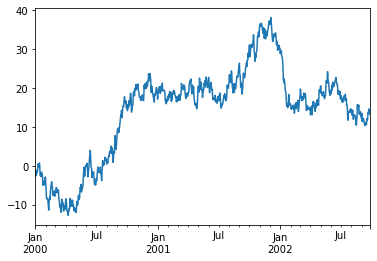

In [122]:
ts.plot();

<div class="alert alert-block alert-info">
    When using Jupyter, the plot will appear using <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot"><code>plot()</code></a>. Otherwise use <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html">matplotlib.pyplot.show</a> to show it or <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html">matplotlib.pyplot.savefig</a> to write it to a file.
</div>

[`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) plots all columns:

<Figure size 432x288 with 0 Axes>

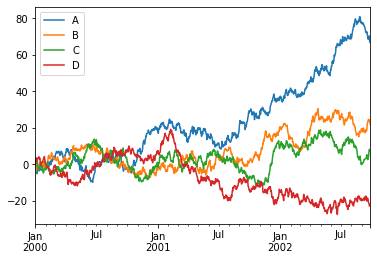

In [123]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best");

## Importing and exporting data

See the [IO Tools](https://pandas.pydata.org/docs/user_guide/io.html#io) section.

### CSV

In [124]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv("output/foo.csv")

[Reading from a csv file:](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table) using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [125]:
pd.read_csv("output/foo.csv")

Unnamed: 0  0  1  2  3  4
0           0  1  0  0  2  0
1           1  0  1  4  4  1
2           2  0  1  1  3  2
3           3  4  0  0  3  1
4           4  3  3  1  1  0
5           5  0  1  3  4  4
6           6  4  3  1  0  0
7           7  0  0  1  4  0
8           8  3  3  0  3  1
9           9  1  1  2  0  0

### Parquet

Writing to a Parquet file:

In [126]:
df.to_parquet("output/foo.parquet")

Reading from a Parquet file Store using [`read_parquet()`](https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html#pandas.read_parquet):

In [127]:
pd.read_parquet("output/foo.parquet")

0  1  2  3  4
0  1  0  0  2  0
1  0  1  4  4  1
2  0  1  1  3  2
3  4  0  0  3  1
4  3  3  1  1  0
5  0  1  3  4  4
6  4  3  1  0  0
7  0  0  1  4  0
8  3  3  0  3  1
9  1  1  2  0  0

### Excel 

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [128]:
df.to_excel("output/foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [129]:
pd.read_excel("output/foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

Unnamed: 0  0  1  2  3  4
0           0  1  0  0  2  0
1           1  0  1  4  4  1
2           2  0  1  1  3  2
3           3  4  0  0  3  1
4           4  3  3  1  1  0
5           5  0  1  3  4  4
6           6  4  3  1  0  0
7           7  0  0  1  4  0
8           8  3  3  0  3  1
9           9  1  1  2  0  0

## Gotchas

If you are attempting to perform a boolean operation on a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) or [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) you might see an exception like:

In [130]:
from IPython.core.magic import register_cell_magic


# This allows the next cell to run even if it returns an error
@register_cell_magic("ignore_errors")
def ignore_errors(line, cell):
    try:
        return eval(cell)
    except Exception as exc:
        print(f"\033[1;31m{exc.__class__.__name__} : \033[1;31;47m{exc}\033[0m")

In [131]:
%%ignore_errors
if pd.Series([False, True, False]):
     print("I was true")

SyntaxError : invalid syntax (<string>, line 1)


See [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) and [Gotchas](https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas) for an explanation and what to do.

<a id="Matplotlib"></a>

# Matplotlib

Matplotlib is like the founding father of data visualization in python. Most other visualization libraries you will come across will build up matplot lib in a variety of ways. As such, it tends to offer the most control, but also be the most tedious/verbose to setup if you want to have *client presentable* results. However basic plots with little formatting serve the needs of most calculation purposes. Newer users, or users that want to get straight to colorful or delieverable ready charts and diagrams would probably benefit from skipping directly to the [Plotly](#Plotly) library tutorial, which provides similar functions with a less verbose user interface that tends to result in more refined results with less work.

## Getting Started

[Source document](https://matplotlib.org/stable/users/explain/quick_start.html#quick-start)

In [132]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

import matplotlib as mpl

mpl.rcParams["figure.figsize"] = (15, 5)

### A simple Example

Matplotlib graphs your data on [Figures](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) (e.g., windows, Jupyter widgets, etc.), each of which can contain one or more [Axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes), an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, x-y-z in a 3D plot, etc.). The simplest way of creating a Figure with an Axes is using [pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots). We can then use [Axes.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) to draw some data on the Axes:

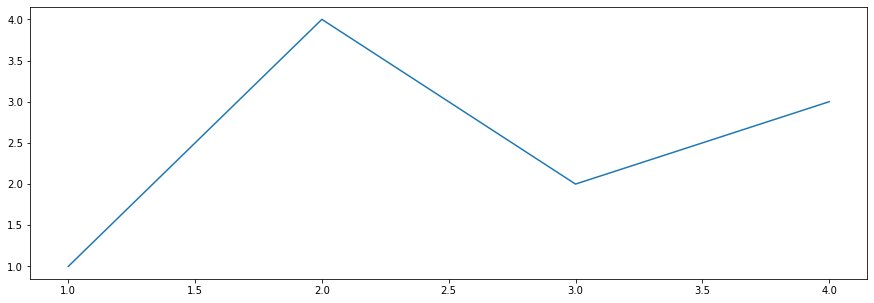

In [133]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

# Note that the ';' is usually ignored in python, but here it can be used to prevent the string appearing before the plot

Note that to get this Figure to display, you may have to call `plt.show()`, depending on your backend. For more details of Figures and backends, see [Introduction to Figures](https://matplotlib.org/stable/users/explain/figure/figure_intro.html#figure-intro).

### Parts of a Figure

Here are the components of a Matplotlib Figure.

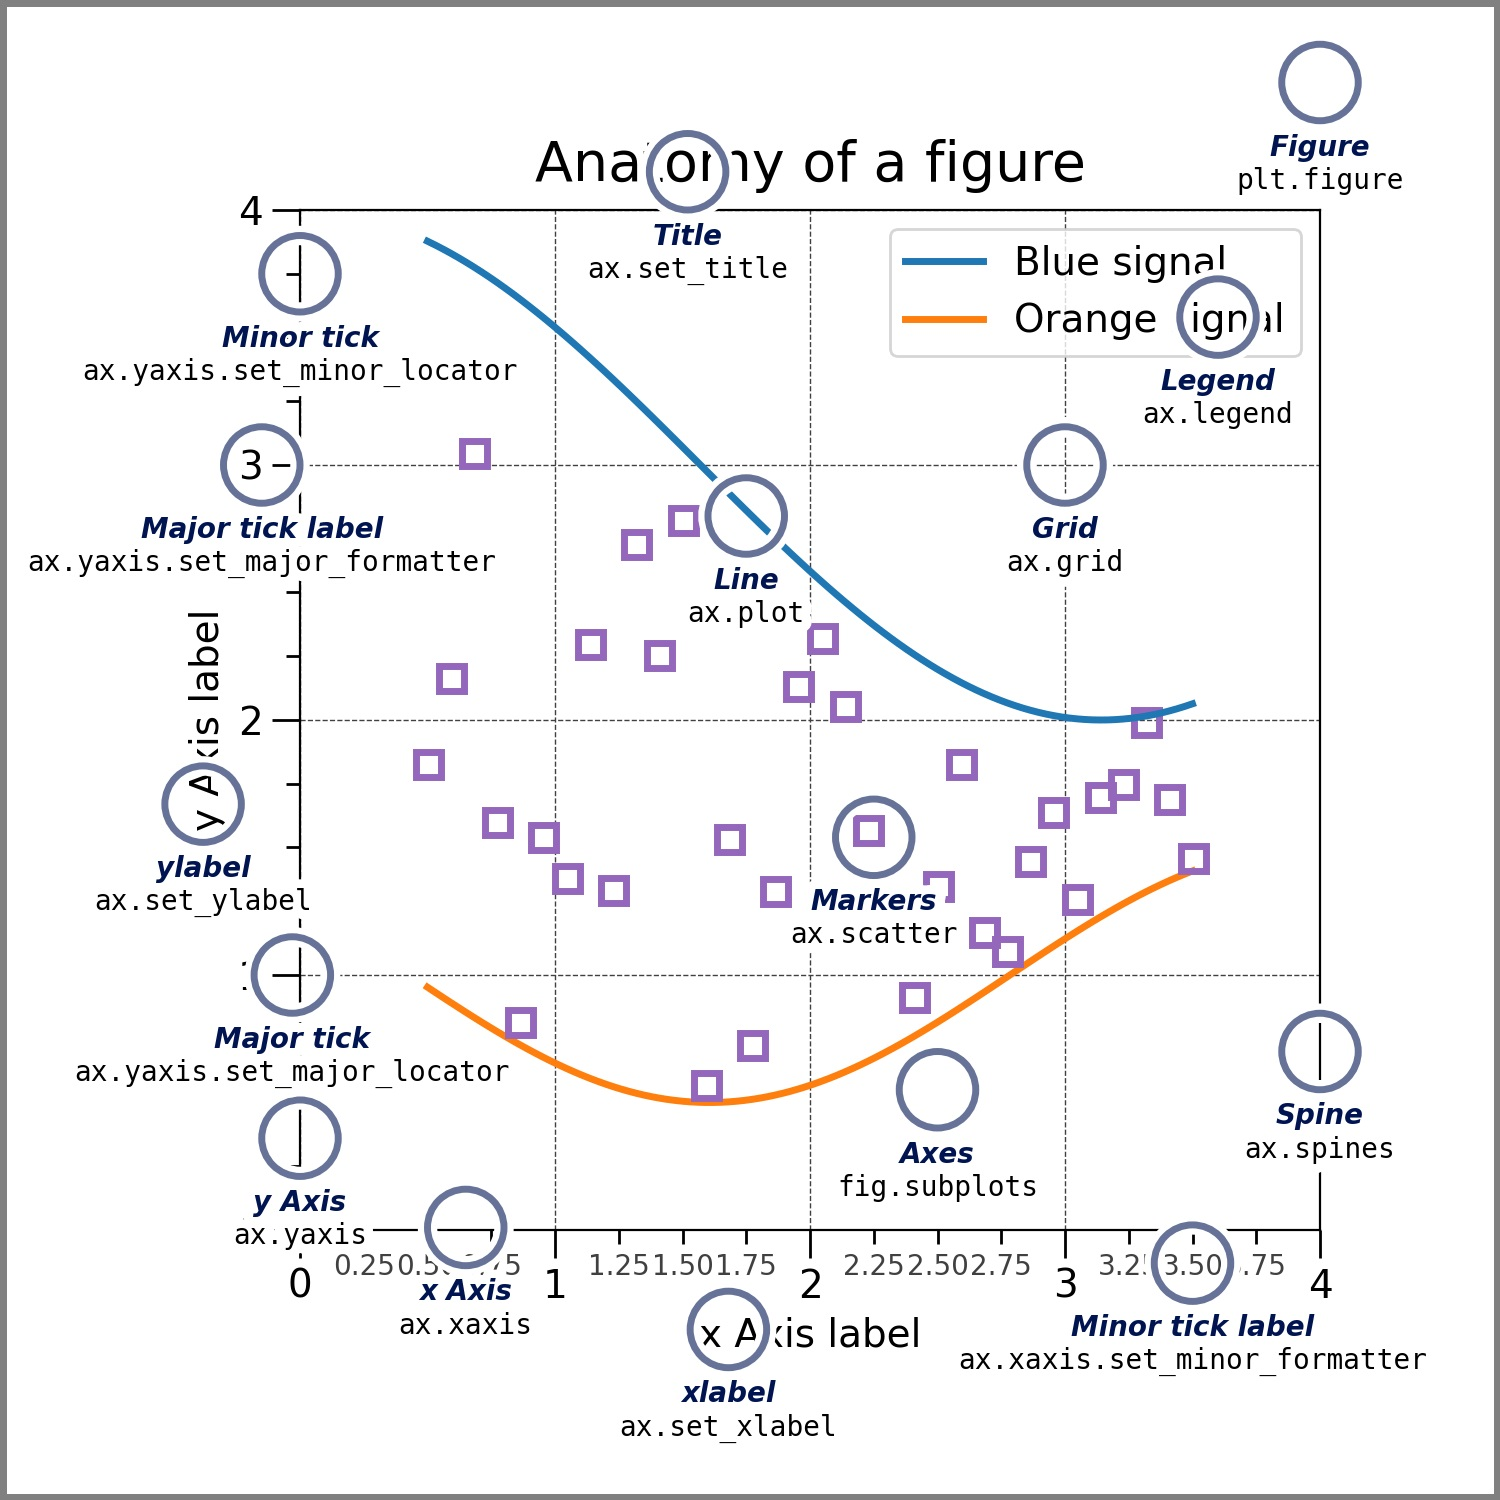

In [134]:
Image(filename="./res/imgs/Data_Visualization/chart_anatomy.jpg")

### [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure)

The **whole** figure. The Figure keeps track of all the child [Axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes), a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.

The easiest way to create a new Figure is with pyplot:

<Figure size 1080x360 with 0 Axes>

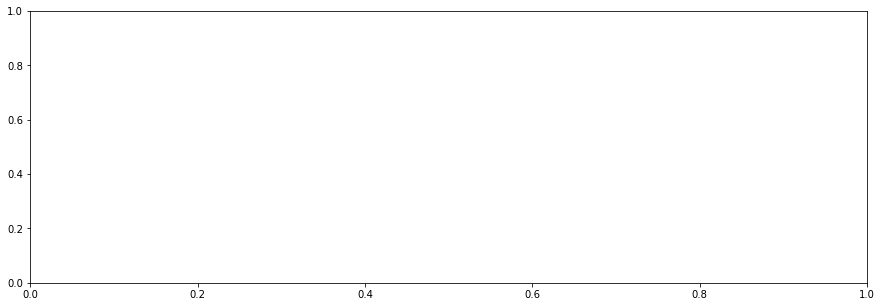

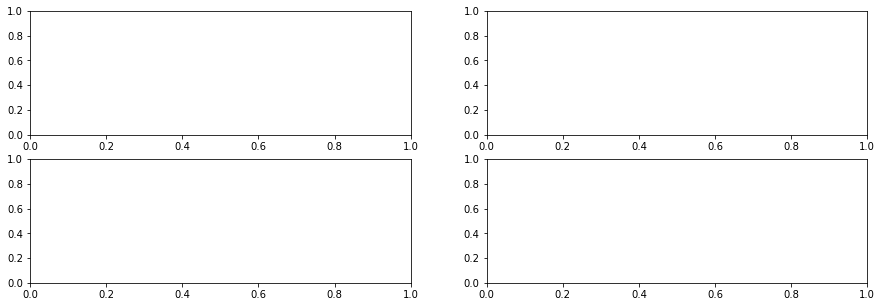

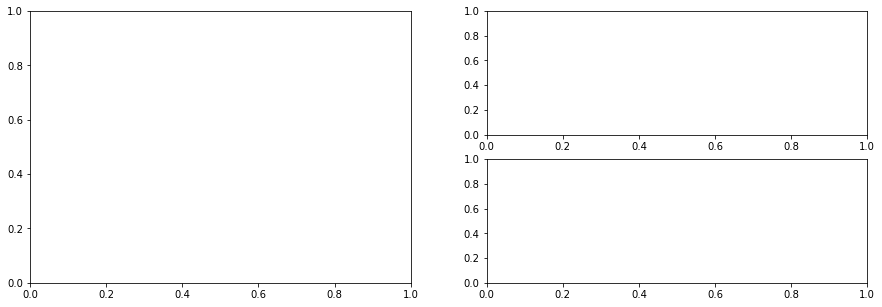

In [135]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([["left", "right_top"], ["left", "right_bottom"]])

It is often convenient to create the Axes together with the Figure, but you can also manually add Axes later on. Note that many [Matplotlib backends](https://matplotlib.org/stable/users/explain/figure/backends.html#backends) support zooming and panning on figure windows.

For more on Figures, see [Introduction to Figures](https://matplotlib.org/stable/users/explain/figure/figure_intro.html#figure-intro).

[Axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes)

An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) [Axis](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis) objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each [Axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) also has a title (set via [`set_title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title)), an x-label (set via [`set_xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel)), and a y-label set via [`set_ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib.axes.Axes.set_ylabel)).

The [Axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) class and its member functions are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them (e.g. `ax.plot()`, shown above, uses the `plot` method)

[Axis](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis)

These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a [Locator](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Locator) object and the ticklabel strings are formatted by a [Formatter](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Formatter). The combination of the correct [Locator](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Locator) and [Formatter](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Formatter) gives very fine control over the tick locations and labels.

[Artist](https://matplotlib.org/stable/api/artist_api.html#matplotlib.artist.Artist)

Basically, everything visible on the Figure is an Artist (even [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure), [Axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes), and [Axis](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis) objects). This includes [Text](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text) objects, [Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) objects, [collections](https://matplotlib.org/stable/api/collections_api.html#module-matplotlib.collections) objects, [Patch](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch) objects, etc. When the Figure is rendered, all of the Artists are drawn to the **canvas**. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

### Types of Inputs to Plotting Functions

Plotting functions expect [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array) or [`numpy.ma.masked_array`](https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_array.html#numpy.ma.masked_array) as input, or objects that can be passed to [`numpy.asarray`](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html#numpy.asarray). Classes that are similar to arrays ('array-like') such as [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html#module-pandas) data objects and [`numpy.matrix`](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html#numpy.matrix) may not work as intended. Common convention is to convert these to [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array) objects prior to plotting. For example, to convert a [`numpy.matrix`](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html#numpy.matrix)

In [136]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

Most methods will also parse a string-indexable object like a dict, a [structured numpy array](https://numpy.org/doc/stable/user/basics.rec.html#structured-arrays#noqa:E501), or a [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame). Matplotlib allows you to provide the `data` keyword argument and generate plots passing the strings corresponding to the *x* and *y* variables.

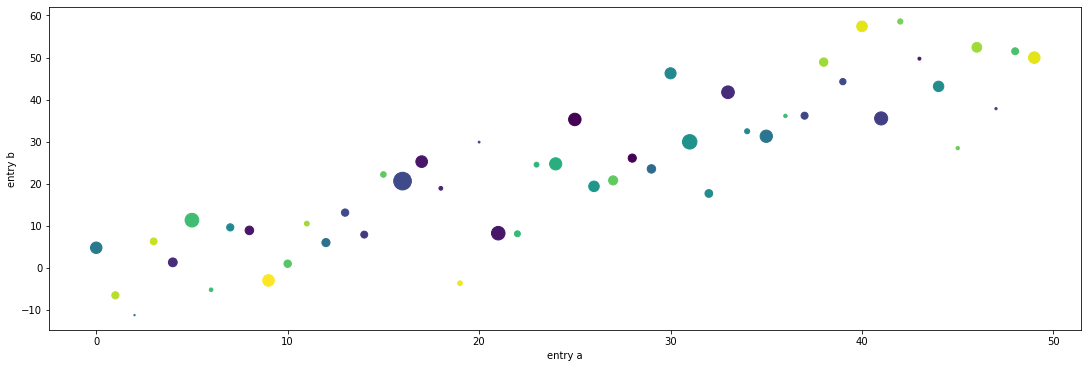

In [137]:
np.random.seed(19680801)  # seed the random number generator.
data = {"a": np.arange(50), "c": np.random.randint(0, 50, 50), "d": np.random.randn(50)}
data["b"] = data["a"] + 10 * np.random.randn(50)
data["d"] = np.abs(data["d"]) * 100

fig, ax = plt.subplots(figsize=(15, 5), layout="constrained")
ax.scatter("a", "b", c="c", s="d", data=data)
ax.set_xlabel("entry a")
ax.set_ylabel("entry b");

### Coding styles

The explicit and the implicit interfaces

As noted above, there are essentially two ways to use Matplotlib:

- Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").
- Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.

See [Matplotlib Application Interfaces (APIs)](https://matplotlib.org/stable/users/explain/figure/api_interfaces.html#api-interfaces) for an explanation of the tradeoffs between the implicit and explicit interfaces.

So one can use the OO-style

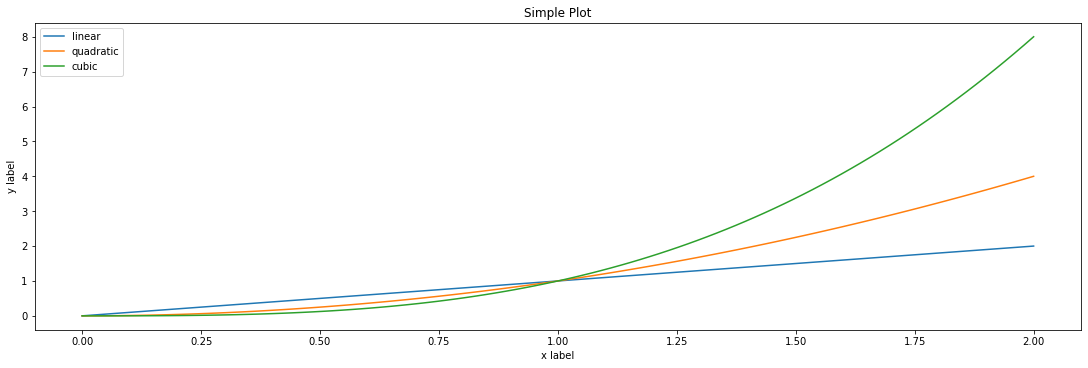

In [138]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(15, 5), layout="constrained")
ax.plot(x, x, label="linear")  # Plot some data on the axes.
ax.plot(x, x**2, label="quadratic")  # Plot more data on the axes...
ax.plot(x, x**3, label="cubic")  # ... and some more.
ax.set_xlabel("x label")  # Add an x-label to the axes.
ax.set_ylabel("y label")  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

or the pyplot-style:

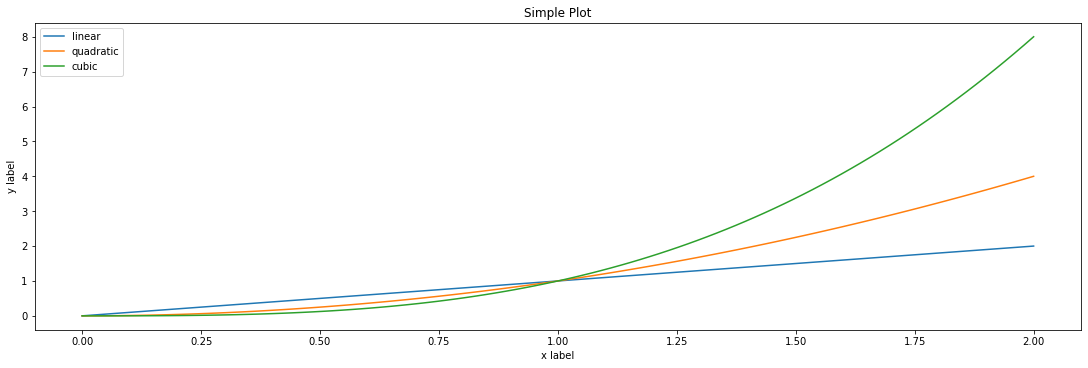

In [139]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(15, 5), layout="constrained")
plt.plot(x, x, label="linear")  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label="quadratic")  # etc.
plt.plot(x, x**3, label="cubic")
plt.xlabel("x label")
plt.ylabel("y label")
plt.title("Simple Plot")
plt.legend();

(In addition, there is a third approach, for the case when embedding Matplotlib in a GUI application, which completely drops pyplot, even for figure creation. See the corresponding section in the gallery for more info: [Embedding Matplotlib in graphical user interfaces.](https://matplotlib.org/stable/gallery/user_interfaces/index.html#user-interfaces))

Matplotlib's documentation and examples use both the OO and the pyplot styles. In general, we suggest using the OO style, particularly for complicated plots, and functions and scripts that are intended to be reused as part of a larger project. However, the pyplot style can be very convenient for quick interactive work.

>**_Note:_** You may find older examples that use the pylab interface, via from pylab import *. This approach is strongly deprecated.

### Making a helper functions

If you need to make the same plots over and over again with different data sets, or want to easily wrap Matplotlib methods, use the recommended signature function below.

In [140]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

which you would then use twice to populate two subplots:

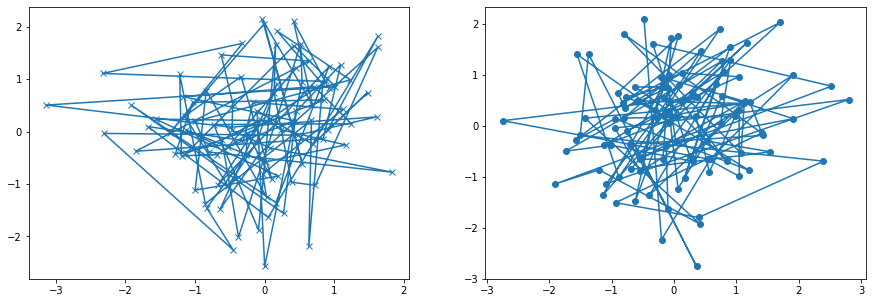

In [141]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
my_plotter(ax1, data1, data2, {"marker": "x"})
my_plotter(ax2, data3, data4, {"marker": "o"});

Note that if you want to install these as a python package, or any other customizations you could use one of the many templates on the web; Matplotlib has one at [mpl-cookiecutter](https://github.com/matplotlib/matplotlib-extension-cookiecutter)

### Styling Artists

Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist. In the plot below we manually set the color, linewidth, and linestyle of the Artists created by [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot), and we set the linestyle of the second line after the fact with [`set_linestyle`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle).

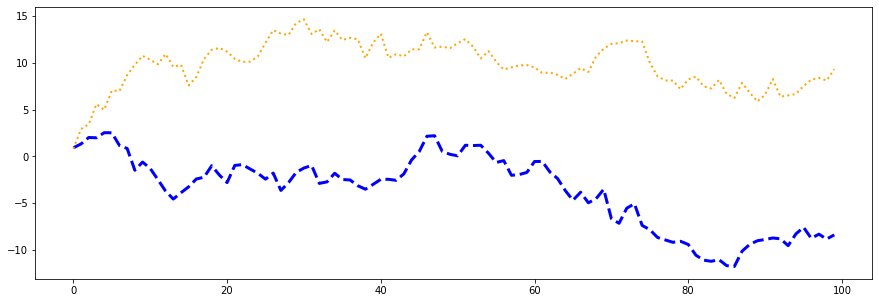

In [142]:
fig, ax = plt.subplots(figsize=(15, 5))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color="blue", linewidth=3, linestyle="--")
(l,) = ax.plot(x, np.cumsum(data2), color="orange", linewidth=2)
l.set_linestyle(":")

### Colors

Matplotlib has a very flexible array of colors that are accepted for most Artists; see [allowable color definitions](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def) for a list of specifications. Some Artists will take multiple colors. i.e. for a [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter) plot, the edge of the markers can be different colors from the interior:

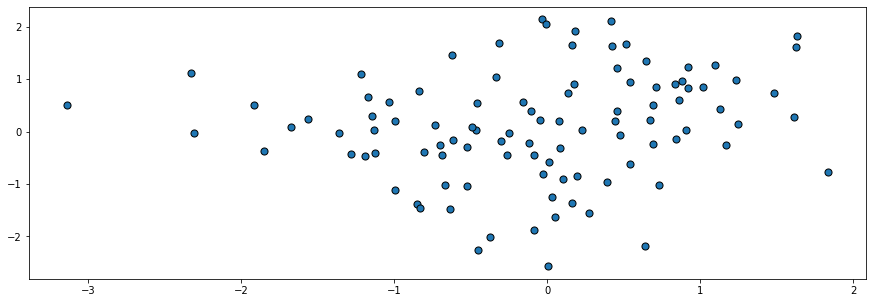

In [143]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(data1, data2, s=50, facecolor="C0", edgecolor="k");

### Linewidths, linestyles, and markersizes

Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle. See the [linestyles example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

Marker size depends on the method being used. [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) specifies markersize in points, and is generally the "diameter" or width of the marker. [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter) specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes (see [`markers`](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)), or users can define their own [`MarkerStyle`](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle) (see [Marker reference](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html)):

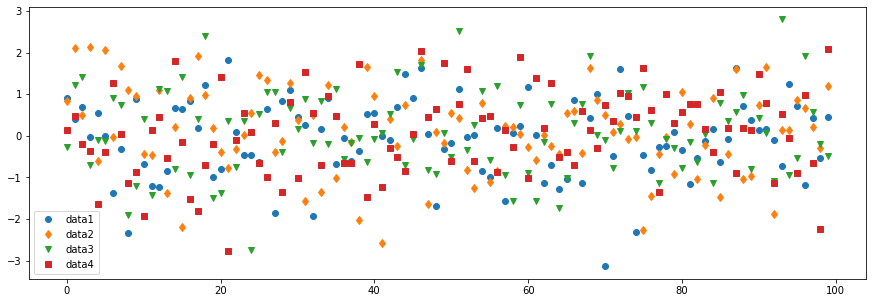

In [144]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(data1, "o", label="data1")
ax.plot(data2, "d", label="data2")
ax.plot(data3, "v", label="data3")
ax.plot(data4, "s", label="data4")
ax.legend();

### Labelling plots

#### Axes labels and text

[`set_xlabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel), [`set_ylabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel), and [`set_title`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel) are used to add text in the indicated locations (see [Text in Matplotlib](https://matplotlib.org/stable/users/explain/text/text_intro.html#text-intro) for more discussion). Text can also be directly added to plots using [`text`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text):

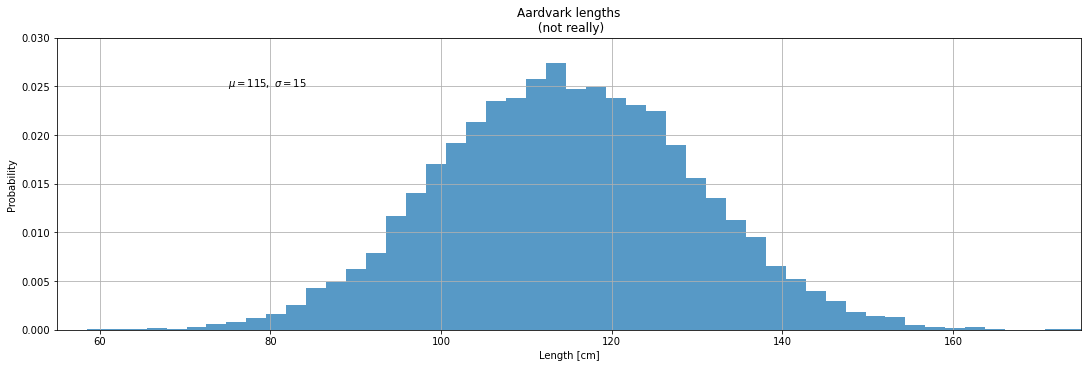

In [145]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(15, 5), layout="constrained")
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor="C0", alpha=0.75)

ax.set_xlabel("Length [cm]")
ax.set_ylabel("Probability")
ax.set_title("Aardvark lengths\n (not really)")
ax.text(75, 0.025, r"$\mu=115,\ \sigma=15$")
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

All of the [`text`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text) functions return a [`matplotlib.text.Text`](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text) instance. Just as with lines above, you can customize the properties by passing keyword arguments into the text functions:

In [146]:
t = ax.set_xlabel("my data", fontsize=14, color="red")

These properties are covered in more detail in [Text properties and layout.](https://matplotlib.org/stable/users/explain/text/text_props.html#text-props)

#### Using mathematical expressions in text

Matplotlib accepts TeX equation expressions in any text expression. For example to write the expression 
 in the title, you can write a TeX expression surrounded by dollar signs:

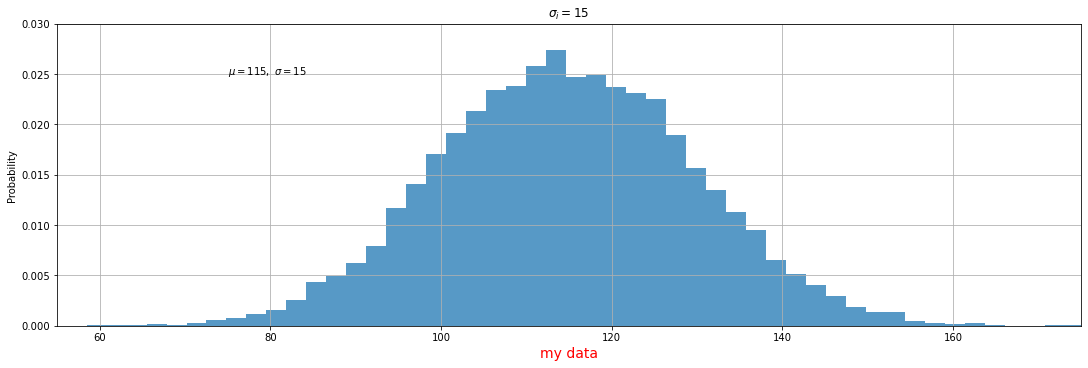

In [147]:
ax.set_title(r"$\sigma_i=15$")
fig

where the `r` preceding the title string signifies that the string is a raw string and not to treat backslashes as python escapes. Matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts – for details see [Writing mathematical expressions](https://matplotlib.org/stable/users/explain/text/mathtext.html#mathtext). You can also use LaTeX directly to format your text and incorporate the output directly into your display figures or saved postscript – see [Text rendering with LaTeX](https://matplotlib.org/stable/users/explain/text/usetex.html#usetex).

#### Annotations

We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at xytext:

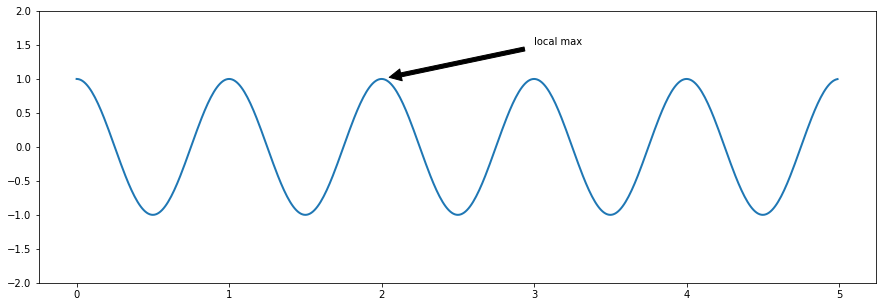

In [148]:
fig, ax = plt.subplots(figsize=(15, 5))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
(line,) = ax.plot(t, s, lw=2)

ax.annotate(
    "local max",
    xy=(2, 1),
    xytext=(3, 1.5),
    arrowprops=dict(facecolor="black", shrink=0.05),
)

ax.set_ylim(-2, 2);

In this basic example, both *xy* and *xytext* are in data coordinates. There are a variety of other coordinate systems one can choose -- see [Basic annotation](https://matplotlib.org/stable/users/explain/text/annotations.html#annotations-tutorial) and [Advanced annotation](https://matplotlib.org/stable/users/explain/text/annotations.html#plotting-guide-annotation) for details. More examples also can be found in [Annotating Plots](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html).

#### Legends

Often we want to identify lines or markers with a Axes.legend:

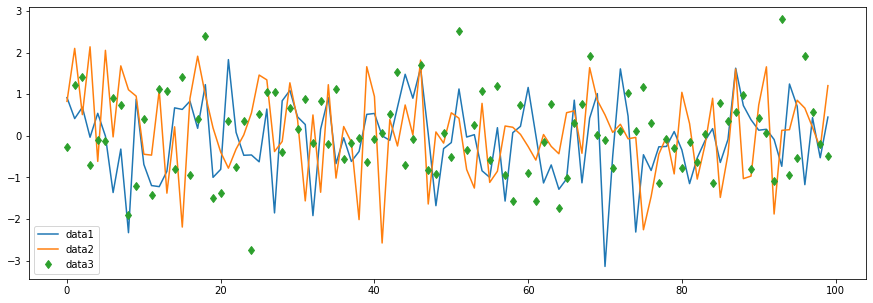

In [149]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(data1)), data1, label="data1")
ax.plot(np.arange(len(data2)), data2, label="data2")
ax.plot(np.arange(len(data3)), data3, "d", label="data3")
ax.legend();

Legends in Matplotlib are quite flexible in layout, placement, and what Artists they can represent. They are discussed in detail in [Legend guide](https://matplotlib.org/stable/users/explain/axes/legend_guide.html#legend-guide).

### Axis scales and ticks

Each Axes has two (or three) [`Axis`](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis) objects representing the x- and y-axis. These control the scale of the Axis, the tick locators and the tick formatters. Additional Axes can be attached to display further Axis objects.

#### Scales

In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like [`loglog`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.loglog.html#matplotlib.axes.Axes.loglog), [`semilogx`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.semilogx.html#matplotlib.axes.Axes.semilogx), and [`semilogy`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.semilogy.html#matplotlib.axes.Axes.semilogy). There are a number of scales (see [Scales](https://matplotlib.org/stable/gallery/scales/scales.html) for other examples). Here we set the scale manually:

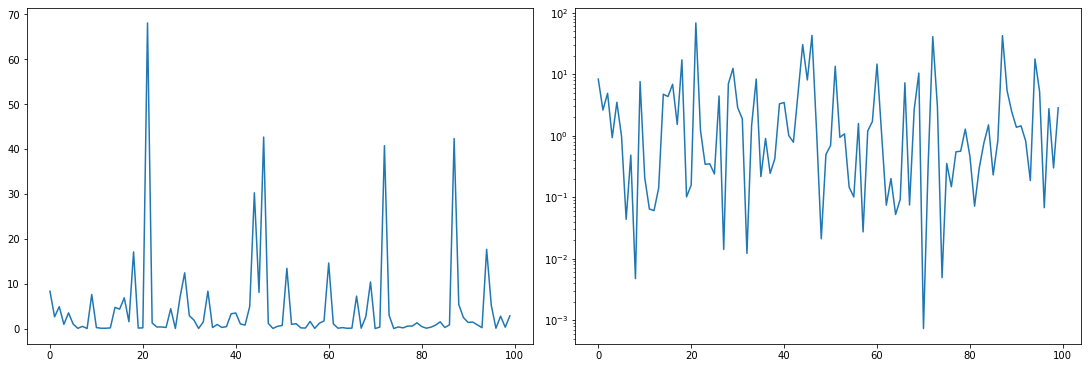

In [150]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout="constrained")
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale("log")
axs[1].plot(xdata, data);

The scale sets the mapping from data values to spacing along the Axis. This happens in both directions, and gets combined into a transform, which is the way that Matplotlib maps from data coordinates to Axes, Figure, or screen coordinates. See [Transformations Tutorial](https://matplotlib.org/stable/users/explain/artists/transforms_tutorial.html#transforms-tutorial).

#### Tick locators and formatters

Each Axis has a tick locator and formatter that choose where along the Axis objects to put tick marks. A simple interface to this is [`set_xticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html#matplotlib.axes.Axes.set_xticks):

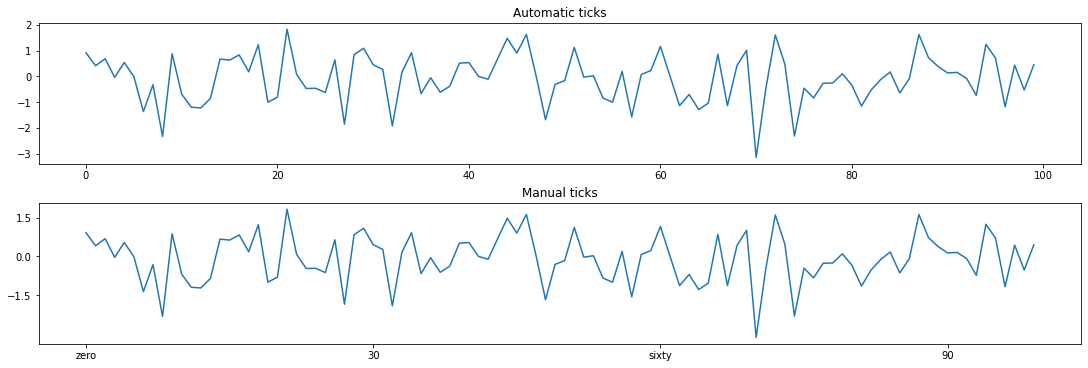

In [151]:
fig, axs = plt.subplots(2, 1, layout="constrained")
axs[0].plot(xdata, data1)
axs[0].set_title("Automatic ticks")

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ["zero", "30", "sixty", "90"])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title("Manual ticks");

Different scales can have different locators and formatters; for instance the log-scale above uses [`LogLocator`](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.LogLocator) and [`LogFormatter`](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.LogFormatter). See [Tick locators](https://matplotlib.org/stable/gallery/ticks/tick-locators.html) and [Tick formatters](https://matplotlib.org/stable/gallery/ticks/tick-formatters.html) for other formatters and locators and information for writing your own.

#### Plotting dates and strings

Matplotlib can handle plotting arrays of dates and arrays of strings, as well as floating point numbers. These get special locators and formatters as appropriate. For dates:

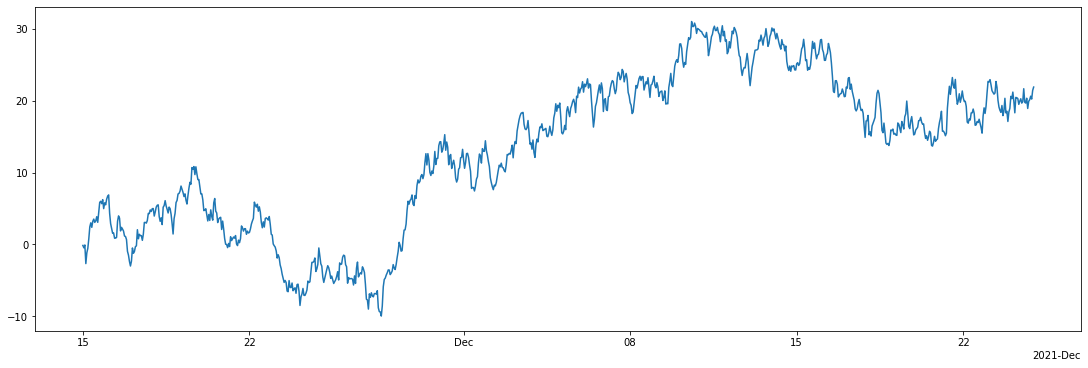

In [152]:
fig, ax = plt.subplots(figsize=(15, 5), layout="constrained")
dates = np.arange(
    np.datetime64("2021-11-15"), np.datetime64("2021-12-25"), np.timedelta64(1, "h")
)
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

For more information see the date examples (e.g. [Date tick labels](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

For strings, we get categorical plotting (see: [Plotting categorical variables](https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html)).

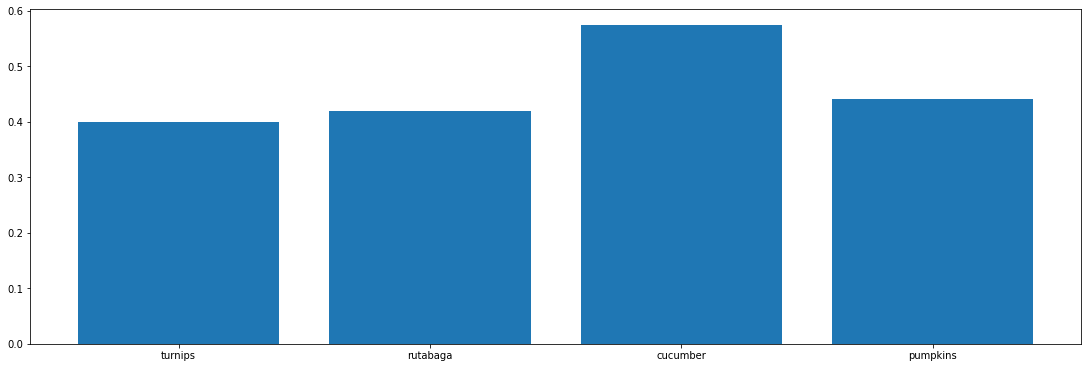

In [153]:
fig, ax = plt.subplots(figsize=(15, 5), layout="constrained")
categories = ["turnips", "rutabaga", "cucumber", "pumpkins"]

ax.bar(categories, np.random.rand(len(categories)));

One caveat about categorical plotting is that some methods of parsing text files return a list of strings, even if the strings all represent numbers or dates. If you pass 1000 strings, Matplotlib will think you meant 1000 categories and will add 1000 ticks to your plot!

#### Additional Axis objects

Plotting data of different magnitude in one chart may require an additional y-axis. Such an Axis can be created by using [`twinx`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html#matplotlib.axes.Axes.twinx) to add a new Axes with an invisible x-axis and a y-axis positioned at the right (analogously for [`twiny`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twiny.html#matplotlib.axes.Axes.twiny)). See [Plots with different scales](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html) for another example.

Similarly, you can add a [`secondary_xaxis`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.secondary_xaxis.html#matplotlib.axes.Axes.secondary_xaxis) or [`secondary_yaxis`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.secondary_yaxis.html#matplotlib.axes.Axes.secondary_yaxis) having a different scale than the main Axis to represent the data in different scales or units. See [Secondary Axis](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html) for further examples.

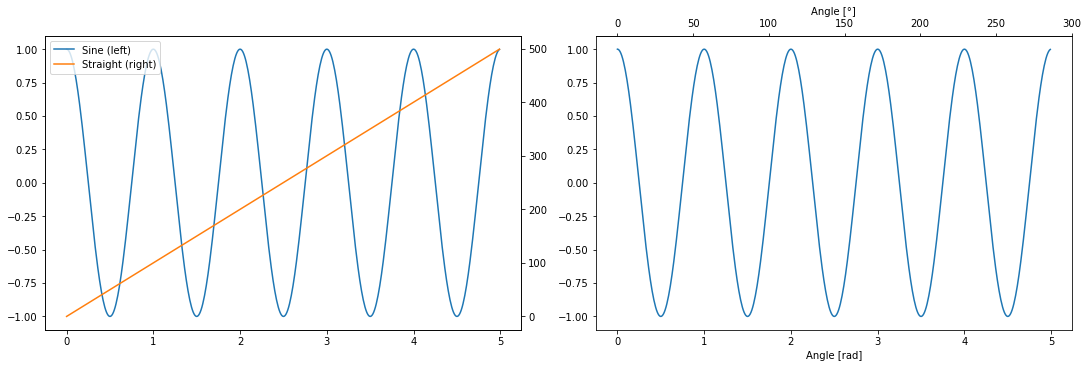

In [154]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(15, 5), layout="constrained")
(l1,) = ax1.plot(t, s)
ax2 = ax1.twinx()
(l2,) = ax2.plot(t, range(len(t)), "C1")
ax2.legend([l1, l2], ["Sine (left)", "Straight (right)"])

ax3.plot(t, s)
ax3.set_xlabel("Angle [rad]")
ax4 = ax3.secondary_xaxis("top", functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel("Angle [°]");

### Color mapped data
Often we want to have a third dimension in a plot represented by a colors in a colormap. Matplotlib has a number of plot types that do this:

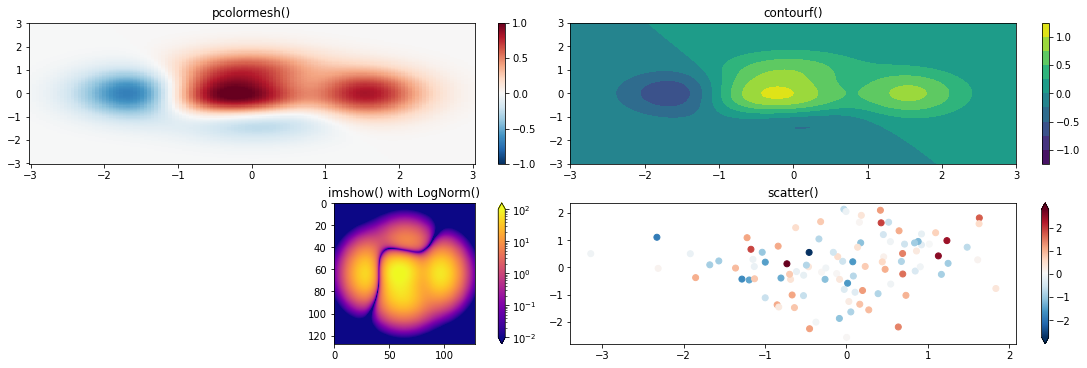

In [155]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X / 2 + X**5 + Y**3) * np.exp(-(X**2) - Y**2)

fig, axs = plt.subplots(2, 2, layout="constrained")
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap="RdBu_r")
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title("pcolormesh()")

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title("contourf()")

pc = axs[1, 0].imshow(
    Z**2 * 100, cmap="plasma", norm=mpl.colors.LogNorm(vmin=0.01, vmax=100)
)
fig.colorbar(pc, ax=axs[1, 0], extend="both")
axs[1, 0].set_title("imshow() with LogNorm()")

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap="RdBu_r")
fig.colorbar(pc, ax=axs[1, 1], extend="both")
axs[1, 1].set_title("scatter()");

### Colormaps

These are all examples of Artists that derive from [ScalarMappable](https://matplotlib.org/stable/api/cm_api.html#matplotlib.cm.ScalarMappable) objects. They all can set a linear mapping between vmin and vmax into the colormap specified by cmap. Matplotlib has many colormaps to choose from ([Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps)) you can make your own ([Creating Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html#colormap-manipulation)) or download as [third-party packages](https://matplotlib.org/mpl-third-party/#colormaps-and-styles).

### Normalizations

Sometimes we want a non-linear mapping of the data to the colormap, as in the `LogNorm` example above. We do this by supplying the ScalarMappable with the norm argument instead of vmin and vmax. More normalizations are shown at [Colormap normalization](https://matplotlib.org/stable/users/explain/colors/colormapnorms.html#colormapnorms).

### Colorbars

Adding a [`colorbar`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.colorbar) gives a key to relate the color back to the underlying data. Colorbars are figure-level Artists, and are attached to a ScalarMappable (where they get their information about the norm and colormap) and usually steal space from a parent Axes. Placement of colorbars can be complex: see [Placing colorbars](https://matplotlib.org/stable/users/explain/axes/colorbar_placement.html#colorbar-placement) for details. You can also change the appearance of colorbars with the extend keyword to add arrows to the ends, and shrink and aspect to control the size. Finally, the colorbar will have default locators and formatters appropriate to the norm. These can be changed as for other Axis objects.

### Working with multiple Figures and Axes

You can open multiple Figures with multiple calls to `fig = plt.figure()` or `fig2, ax = plt.subplots()`. By keeping the object references you can add Artists to either Figure.

Multiple Axes can be added a number of ways, but the most basic is `plt.subplots()` as used above. One can achieve more complex layouts, with Axes objects spanning columns or rows, using [`subplot_mosaic`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot_mosaic.html#matplotlib.pyplot.subplot_mosaic).

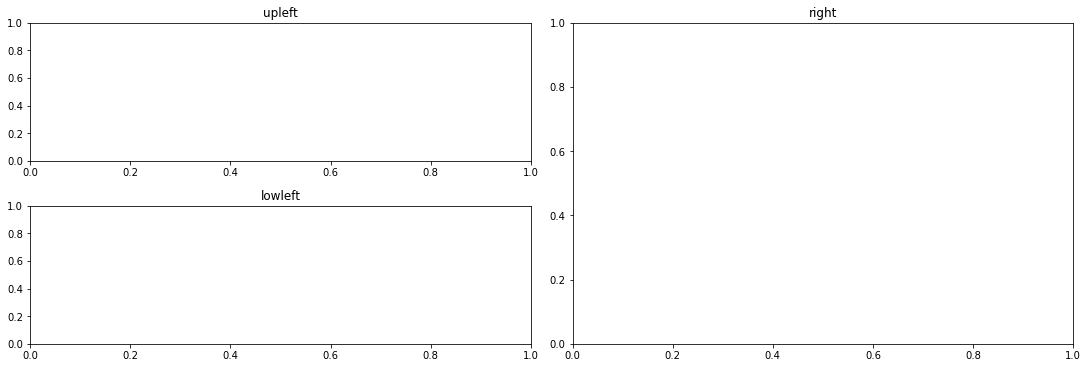

In [156]:
fig, axd = plt.subplot_mosaic(
    [["upleft", "right"], ["lowleft", "right"]], layout="constrained"
)
axd["upleft"].set_title("upleft")
axd["lowleft"].set_title("lowleft")
axd["right"].set_title("right");

Matplotlib has quite sophisticated tools for arranging Axes: See [Arranging multiple Axes in a Figure](https://matplotlib.org/stable/users/explain/axes/arranging_axes.html#arranging-axes) and [Complex and semantic figure composition (subplot_mosaic)](https://matplotlib.org/stable/users/explain/axes/mosaic.html#mosaic).

## More reading

For more plot types see [Plot types](https://matplotlib.org/stable/plot_types/index.html) and the [API reference](https://matplotlib.org/stable/api/index.html), in particular the [Axes API](https://matplotlib.org/stable/api/axes_api.html).

In [157]:
print(
    f"Time required for matplotlib training to run {round(time.time() - start_time, 3)}s"
)

Time required for matplotlib training to run 10.669s


<a id='Plotly'></a>

# Plotly

[Tutorial Source](https://plotly.com/python/plotly-fundamentals/)

## Introduction

### [The Figure Data Structure](https://plotly.com/python/figure-structure/)

In python Plotly is a wrapper on the Plotly JavaScript Library, which is utilized to implement web based interactive charts, plots maps and diagrams. The underlaying datastructure is referred to as a `figure`. Figures can be represented in Python either as dicts or as instances of the `plotly.graph_objects.Figure` class and are serialized as text in JSON format before being passed to Plotly.js.

The recommended entry point to ploty is the hgih level `plotly.express module` which return fully populated `plotly.graph_objects.Figure` objects. The following is a discussion of the architecture of the data structure that these objects represent.

Viewing the underlying data structure for any plotly.graph_objects.Figure object, including those returned by Plotly Express, can be done via print(fig) or, in JupyterLab, with the special fig.show("json") renderer. Figures also support fig.to_dict() and fig.to_json() methods. print()ing the figure will result in the often-verbose layout.template key being represented as ellipses '...' for brevity.

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['a', 'b', 'c'], dtype=object),
              'xaxis': 'x',
              'y': array([1, 3, 2], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'sample figure'},
               'xaxis': {'anchor': 'y', 'domain': [0.25, 0.75], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})


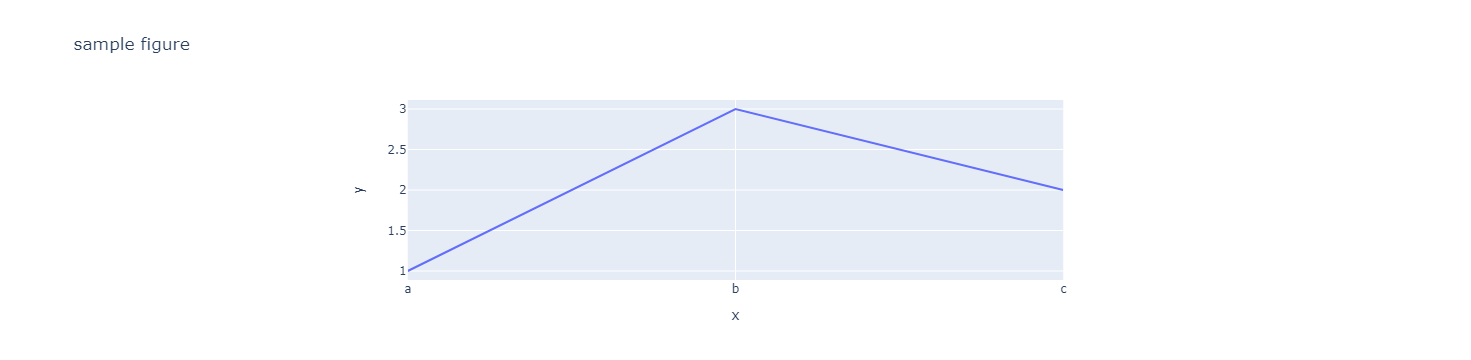

In [158]:
import plotly.express as px

fig = px.line(x=["a", "b", "c"], y=[1, 3, 2], title="sample figure")

# Didn't like the way the figure was resizing, so adjusted it here
# Feel free to adjust by editing other attributes to see what happens
fig.layout.xaxis.domain = [0.25, 0.75]
fig.layout.yaxis.domain = [0.0, 1]

print(fig)
fig.show()

### Figure structures in Dash

Dash is the best way to build analyical apps in Python using Plotly figures.

See [the official Dash docs](https://dash.plotly.com/installation?_gl=1*gdl6n9*_ga*MTk3Mzc4MjY3Ni4xNzE0Nzc5NzAy*_ga_6G7EE0JNSC*MTcxNDc3OTcwMi4xLjEuMTcxNDc4MjAyNC42MC4wLjA.).

In [159]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import json

fig = px.line(
    x=["a", "b", "c"],
    y=[1, 3, 2],  # replace with your own data source
    title="sample figure",
    height=325,
)

fig.layout.xaxis.domain = [0.25, 0.75]
fig.layout.yaxis.domain = [0.0, 1]

app = Dash(__name__)

app.layout = html.Div(
    [
        html.H4("Displaying figure structure as JSON"),
        dcc.Graph(id="graph", figure=fig),
        dcc.Clipboard(target_id="structure"),
        html.Pre(
            id="structure",
            style={
                "border": "thin lightgrey solid",
                "overflowY": "scroll",
                "height": "275px",
            },
        ),
    ]
)


@app.callback(Output("structure", "children"), Input("graph", "figure"))
def display_structure(fig_json):
    return json.dumps(fig_json, indent=2)


app.run_server(debug=True)

Default values are populated on rendering if not specified by the user. The data hierarchy of figure objects starts with three top level attributes, `data`, `layout` and `frames`.

#### The Top-Level data Attribute

The first of the three top-level attributes of a figure is data, whose value must be a list of dicts referred to as "traces".

- Each trace has one of more than 40 possible types (see below for a list organized by subplot type, including [scatter](https://plotly.com/python/line-and-scatter/), [bar](https://plotly.com/python/bar-charts/), [pie](https://plotly.com/python/pie-charts/), [surface](https://plotly.com/python/3d-surface-plots/), [choropleth etc](https://plotly.com/python/choropleth-maps/), and represents a set of related graphical marks in a figure. Each trace must have a type attribute which defines the other allowable attributes.
- Each trace is drawn on a single [subplot](https://plotly.com/python/subplots/) whose type must be compatible with the trace's type, or is its own subplot (see below).
- Traces may have a single [legend](https://plotly.com/python/legend/) entry, with the exception of pie and funnelarea traces (see below).
- Certain trace types support [continuous color, with an associated colorbar](https://plotly.com/python/colorscales/), which can be controlled by attributes either within the trace, or within the layout when using the [coloraxis attribute](https://plotly.com/python/colorscales/).

#### The Top-Level layout Attribute

The second of the three top-level attributes of a figure is layout, whose value is referred to in text as "the layout" and must be a dict, containing attributes that control positioning and configuration of non-data-related parts of the figure such as:

- Dimensions and margins, which define the bounds of "paper coordinates" (see below)
- Figure-wide defaults: [templates](https://plotly.com/python/templates/), [fonts](https://plotly.com/python/figure-labels/), colors, hover-label and modebar defaults
- [Title](https://plotly.com/python/figure-labels/) and [legend](https://plotly.com/python/legend/) (positionable in container and/or paper coordinates)
- [Color axes and associated color bars](https://plotly.com/python/colorscales/) (positionable in paper coordinates)
    - Subplots of various types on which can be drawn multiple traces and which are positioned in paper coordinates:
    - xaxis, yaxis, xaxis2, yaxis3 etc: X and Y cartesian axes, the intersections of which are cartesian subplots
    - scene, scene2, scene3 etc: 3d scene subplots
    - ternary, ternary2, ternary3, polar, polar2, polar3, geo, geo2, geo3, mapbox, mapbox2, mabox3, smith, smith2 etc: ternary, polar, geo, mapbox or smith subplots
- Non-data marks which can be positioned in paper coordinates, or in data coordinates linked to 2d cartesian subplots:
    - annotations: [textual annotations with or without arrows](https://plotly.com/python/text-and-annotations/)
    - shapes: [lines, rectangles, ellipses or open or closed paths](https://plotly.com/python/shapes/)
    - images: [background or decorative images](https://plotly.com/python/images/)
- Controls which can be positioned in paper coordinates and which can trigger Plotly.js functions when interacted with by a user:
    - updatemenus: [single buttons, toggles](https://plotly.com/python/custom-buttons/) and [dropdown menus](https://plotly.com/python/dropdowns/)
    - sliders: [slider controls](https://plotly.com/python/sliders/)

#### The Top-Level frames Attribute

The third of the three top-level attributes of a figure is frames, whose value must be a list of dicts that define sequential frames in an [animated plot](https://plotly.com/python/animations/). Each frame contains its own data attribute as well as other parameters. Animations are usually triggered and controlled via controls defined in layout.sliders and/or layout.updatemenus

### The config Object

At [render-time](https://plotly.com/python/renderers/), it is also possible to control certain figure behaviors which are not considered part of the figure proper i.e. the behavior of the "modebar" and how the figure relates to mouse actions like scrolling etc. The object that contains these options is called the config, [and has its own documentation page](https://plotly.com/python/configuration-options/). It is exposed in Python as the config keyword argument of the .show() method on plotly.graph_objects.Figure objects.

### Positioning With Paper, Container Coordinates, or Axis Domain Coordinates

Various figure components configured within the layout of the figure support positioning attributes named x or y, whose values may be specified in "paper coordinates" (sometimes referred to as "plot fractions" or "normalized coordinates"). Examples include `layout.xaxis.domain` or `layout.legend.x` or `layout.annotation[].x`.

Positioning in paper coordinates is not done in absolute pixel terms, but rather in terms relative to a coordinate system defined with an origin (0,0) at (`layout.margin.l`, `layout.margin.b`) and a point (1,1) at (`layout.width-layout.margin.r`, `layout.height-layout.margin.t`) (note: `layout.margin` values are pixel values, as are `layout.width` and `layout.height`). Paper coordinate values less than 0 or greater than 1 are permitted, and refer to areas within the plot margins.

To position an object in "paper" coordinates, the corresponding axis reference is set to "paper". For instance a shape's xref attribute would be set to "paper" so that the x value of the shape refers to its position in paper coordinates.

Note that the contents of the layout.margin attribute are by default computed based on the position and dimensions of certain items like the title or legend, and may be made dependent on the position and dimensions of tick labels as well when setting the layout.xaxis.automargin attribute to True. This has the effect of automatically increasing the margin values and therefore shrinking the physical area defined between the (0,0) and (1,1) points. Positioning certain items at paper coordinates less than 0 or greater than 1 will also trigger this behavior. The layout.width and layout.height, however, are taken as givens, so a figure will never grow or shrink based on its contents.

The figure title may be positioned using "container coordinates" which have (0,0) and (1,1) anchored at the bottom-left and top-right of the figure, respectively, and therefore are independent of the values of layout.margin.

Furthermore, shapes, annotations, and images can be placed relative to an axis's domain so that, for instance, an x value of 0.5 would place the object halfway along the x-axis, regardless of the domain as specified in the `layout.xaxis.domain` attribute. This behavior can be specified by adding `'domain'` to the axis reference in the axis referencing attribute of the object. For example, setting `yref = 'y2 domain'` for a shape will refer to the length and position of the axis named `y2`.

### 2D Cartesian Trace Types and Subplots

The most commonly-used kind of subplot is a [two-dimensional Cartesian subplot](https://plotly.com/python/axes/). Traces compatible with these subplots support `xaxis` and `yaxis` attributes whose values must refer to corresponding objects in the layout portion of the figure. For example, if `xaxis="x"`, and `yaxis="y"` (which is the default) then this trace is drawn on the subplot at the intersection of the axes configured under `layout.xaxis` and `layout.yaxis`, but if `xaxis="x2"` and `yaxis="y3"` then the trace is drawn at the intersection of the axes configured under layout.xaxis2 and layout.yaxis3. Note that attributes such as `layout.xaxis` and `layout.xaxis2` etc do not have to be explicitly defined, in which case default values will be inferred. Multiple traces of different types can be drawn on the same subplot.

X- and Y-axes support the type attribute, which enables them to represent [continuous values (type="linear", type="log")](https://plotly.com/python/axes/), [temporal values (type="date")](https://plotly.com/python/time-series/) or [categorical values (type="category", type="multicategory)](https://plotly.com/python/bar-charts/). Axes can also be overlaid on top of one another to create [dual-axis or multiple-axis charts](https://plotly.com/python/multiple-axes/). 2-d cartesian subplots lend themselves very well to creating ["small multiples" figures, also known as facet or trellis plots](https://plotly.com/python/facet-plots/).

The following trace types are compatible with 2d-cartesian subplots via the xaxis and yaxis attributes:

- scatter-like trace types: [scatter](https://plotly.com/python/line-and-scatter/) and [scattergl](https://plotly.com/python/webgl-vs-svg/), which can be used to draw [scatter plots](https://plotly.com/python/line-and-scatter/), [line plots and curves](https://plotly.com/python/line-charts/), [time-series plots](https://plotly.com/python/time-series/), [bubble charts](https://plotly.com/python/bubble-charts/), [dot plots](https://plotly.com/python/dot-plots/) and [filled areas](https://plotly.com/python/filled-area-plots/) and also support [error bars](https://plotly.com/python/error-bars/)
- [bar](https://plotly.com/python/bar-charts/), [funnel](https://plotly.com/python/funnel-charts/), [waterfall](https://plotly.com/python/waterfall-charts/): bar-like trace types which can also be used to draw [timelines and Gantt charts](https://plotly.com/python/gantt/)
- [histogram](https://plotly.com/python/histograms/): an aggregating bar-like trace type
- [box](https://plotly.com/python/box-plots/) and [violin](https://plotly.com/python/box-plots/): 1-dimensional distribution-like trace types
- [histogram2d](https://plotly.com/python/2D-Histogram/) and [histogram2dcontour](https://plotly.com/python/2d-histogram-contour/): 2-dimensional distribution-like density trace types
- [image](https://plotly.com/python/imshow/), [heatmap](https://plotly.com/python/heatmaps/) and [contour](https://plotly.com/python/contour-plots/): matrix trace types
- [ohlc](https://plotly.com/python/ohlc-charts/) and [candlestick](https://plotly.com/python/candlestick-charts/): stock-like trace types
- [carpet](https://plotly.com/python/carpet-plot/): a special trace type for building [carpet plots](https://plotly.com/python/carpet-plot/), in that other traces can use as subplots (see below)
- [splom](https://plotly.com/python/splom/): multi-dimensional scatter plots which implicitly refer to many 2-d cartesian subplots at once.

### 3D, Polar, Ternary and Smith Trace Types and Subplots

Beyond 2D cartesian subplots, figures can [include three-dimensional cartesian subplots](https://plotly.com/python/3d-charts/), [polar subplots](https://plotly.com/python/polar-chart/), [ternary subplots](https://plotly.com/python/ternary-plots/) and [smith subplots](https://plotly.com/python/smith-charts/). The following trace types support attributes named `scene`, `polar`, `smith` or `ternary`, whose values must refer to corresponding objects in the layout portion of the figure i.e. `ternary="ternary2"` etc. Note that attributes such as `layout.scene` and `layout.ternary2` etc do not have to be explicitly defined, in which case default values will be inferred. Multiple traces of a compatible type can be placed on the same subplot.

The following trace types are compatible with 3D subplots via the scene attribute, which contains special [camera controls](https://plotly.com/python/3d-camera-controls/):

- [scatter3d](https://plotly.com/python/3d-scatter-plots/), which can be used to draw [individual markers](https://plotly.com/python/3d-scatter-plots/), [3d bubble charts](https://plotly.com/python/3d-bubble-charts/) and [lines and curves](https://plotly.com/python/3d-line-plots/)
- [surface](https://plotly.com/python/3d-surface-plots/) and [mesh](https://plotly.com/python/3d-mesh/): 3d surface trace types
- [cone](https://plotly.com/python/cone-plot/) and [streamtube](https://plotly.com/python/streamtube-plot/): 3d vector field trace types
- [volume](https://plotly.com/python/3d-volume-plots/) and [isosurface](https://plotly.com/python/3d-isosurface-plots/): 3d volume trace types

The following trace types are compatible with polar subplots via the `polar` attribute:

- scatter-like trace types: [scatterpolar and scatterpolargl](https://plotly.com/python/polar-chart/), which can be used to draw individual markers, [curves and filled areas (i.e. radar or spider charts)](https://plotly.com/python/radar-chart/)
- [barpolar](https://plotly.com/python/wind-rose-charts/): useful for [wind roses](https://plotly.com/python/wind-rose-charts/) and other polar bar charts

The following trace types are compatible with ternary subplots via the ternary attribute:

- [scatterternary](https://plotly.com/python/ternary-plots/), which can be used to draw individual markers, [curves and filled areas](https://plotly.com/python/ternary-contour/)

The following trace types are compatible with smith subplots via the smith attribute:

- [scattersmith](https://plotly.com/python/smith-charts/), which can be used to draw individual markers, curves and filled areas


### Map Trace Types and Subplots

Figures can include two different types of map subplots: [geo subplots for outline maps](https://plotly.com/python/map-configuration/) and [mapbox subplots for tile maps](https://plotly.com/python/mapbox-layers/). The following trace types support attributes named `geo` or `mapbox`, whose values must refer to corresponding objects in the layout i.e. `geo="geo2"` etc. Note that attributes such as `layout.geo2` and `layout.mapbox` etc do not have to be explicitly defined, in which case default values will be inferred. Multiple traces of a compatible type can be placed on the same subplot.

The following trace types are compatible with geo subplots via the geo attribute:

- [scattergeo](https://plotly.com/python/scatter-plots-on-maps/), which can be used to draw [individual markers](https://plotly.com/python/scatter-plots-on-maps/), [line and curves](https://plotly.com/python/lines-on-maps/) and filled areas on outline maps
- [choropleth](https://plotly.com/python/choropleth-maps/): [colored polygons](https://plotly.com/python/choropleth-maps/) on outline maps

The following trace types are compatible with mapbox subplots via the mapbox attribute:

- [scattermapbox](https://plotly.com/python/scattermapbox/), which can be used to draw [individual markers](https://plotly.com/python/scattermapbox/), [lines and curves](https://plotly.com/python/lines-on-mapbox/) and [filled areas](https://plotly.com/python/filled-area-on-mapbox/) on tile maps
- [choroplethmapbox](https://plotly.com/python/mapbox-county-choropleth/): colored polygons on tile maps
- [densitymapbox](https://plotly.com/python/mapbox-density-heatmaps/): density heatmaps on tile maps


### Traces Which Are Their Own Subplots

Certain trace types cannot share subplots, and hence have no attribute to map to a corresponding subplot in the layout. Instead, these traces are their own subplot and support a domain attribute for position, which enables the trace to be positioned in paper coordinates (see below). With the exception of pie and funnelarea, such traces also do not support legends (see below)

The following trace types are their own subplots and support a domain attribute:

- [pie](https://plotly.com/python/pie-charts/) and [funnelarea](https://plotly.com/python/waterfall-charts/): one-level part-to-whole relationships with legend items
- [sunburst](https://plotly.com/python/sunburst-charts/) and [treemap](https://plotly.com/python/treemaps/): hierarchical multi-level part-to-whole relationships
- [parcoords](https://plotly.com/python/parallel-coordinates-plot/) and [parcats](https://plotly.com/python/parallel-categories-diagram/): continuous and categorical multidimensional figures with [parallel coordinates](https://plotly.com/python/parallel-coordinates-plot/) and [parallel sets](https://plotly.com/python/parallel-categories-diagram/)
- [sankey: flow diagrams](https://plotly.com/python/sankey-diagram/)
- [table: text-based tables](https://plotly.com/python/table/)
- [indicator](https://plotly.com/python/indicator/): big numbers, [gauges](https://plotly.com/python/gauge-charts/), and [bullet charts](https://plotly.com/python/bullet-charts/)

### Carpet Trace Types and Subplots

Certain trace types use [traces of type carpet as a subplot](https://plotly.com/python/carpet-plot/). These support a carpet attribute whose value must match the value of the carpet attribute of the carpet trace they are to be drawn on. Multiple compatible traces can be placed on the same carpet trace.

The following trace types are compatible with carpet trace subplots via the carpet attribute:

- [scattercarpet](https://plotly.com/python/carpet-scatter/), which can be used to draw individual markers, curves and filled areas
- [contourcarpet](https://plotly.com/python/carpet-plot/)

### Trace Types, Legends and Color Bars

Traces of most types can be optionally associated with a single legend item in the [legend](https://plotly.com/python/legend/). Whether or not a given trace appears in the legend is controlled via the `showlegend` attribute. Traces which are their own subplots (see above) do not support this, with the exception of traces of type `pie` and `funnelarea` for which every distinct color represented in the trace gets a separate legend item. Users may show or hide traces by clicking or double-clicking on their associated legend item. Traces that support legend items also support the `legendgroup` attribute, and all traces with the same legend group are treated the same way during click/double-click interactions.

The fact that legend items are linked to traces means that when using [discrete color](https://plotly.com/python/discrete-color/), a figure must have one trace per color in order to get a meaningful legend. [Plotly Express has robust support for discrete color](https://plotly.com/python/discrete-color/) to make this easy.

Traces which support [continuous color](https://plotly.com/python/colorscales/) can also be associated with color axes in the layout via the `coloraxis` attribute. Multiple traces can be linked to the same color axis. Color axes have a legend-like component called color bars. Alternatively, color axes can be configured within the trace itself.

### What About Dash?

[Dash](https://dash.plot.ly/) is an open-source framework for building analytical applications, with no Javascript required, and it is tightly integrated with the Plotly graphing library.

Learn about how to install Dash at [https://dash.plot.ly/installation](https://dash.plot.ly/installation).

Everywhere in this page that you see fig.show(), you can display the same figure in a Dash application by passing it to the `figure` argument of the [Graph component](https://dash.plot.ly/dash-core-components/graph) from the built-in dash_core_components package like this:

```python
import plotly.graph_objects as go # or plotly.express as px
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

from dash import Dash, dcc, html

app = Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter
```

## Plot Types Demonstrations

A single angular Gauge Chart;

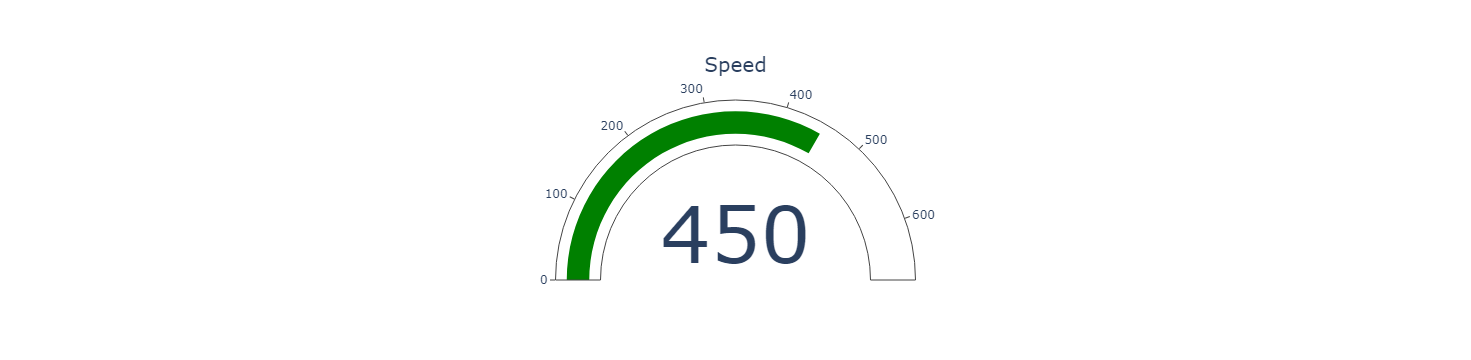

In [162]:
import plotly.graph_objects as go

fig = go.Figure(
    go.Indicator(
        mode="gauge+number",
        value=450,
        title={"text": "Speed"},
        domain={"x": [0, 1], "y": [0, 1]},
    )
)

fig.show()